In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

constituencywise_results = pd.read_csv('/content/drive/MyDrive/Raw Data/constituencywise_results.csv')
statewise_results = pd.read_csv('/content/drive/MyDrive/Raw Data/statewise_results.csv')
states = pd.read_csv('/content/drive/MyDrive/Raw Data/states.csv')
partywise_results = pd.read_csv('/content/drive/MyDrive/Raw Data/partywise_results.csv')
constituencywise_details = pd.read_csv('/content/drive/MyDrive/Raw Data/constituencywise_details.csv')


In [142]:
constituencywise_details.head(3)

,S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Constituency ID
0,1,DR JITENDRA SINGH,Bharatiya Janata Party,566833,4243,571076,51.28,U084
1,2,CH LAL SINGH,Indian National Congress,444151,2552,446703,40.11,U084
2,3,GHULAM MOHD SAROORI,Independent,39519,80,39599,3.56,U084


In [143]:
constituencywise_results.head(3)

,S.No,Parliament Constituency,Constituency Name,Winning Candidate,Total Votes,Margin,Constituency ID,Party ID
0,222,ADILABAD(1),ADILABAD,GODAM NAGESH,568168,90652,S291,369
1,162,AGRA(18),AGRA,PROF S P SINGH BAGHEL,599397,271294,S2418,369
2,33,AHMEDABADEAST(7),AHMEDABADEAST,HASMUKHBHAI PATEL (H.S.PATEL),770459,461755,S067,369


In [144]:
statewise_results.head(3)

,Constituency,Const. No.,Parliament Constituency,Leading Candidate,Trailing Candidate,Margin,Status,State ID,Country
0,Surat,24,SURAT(24),MUKESHKUMAR CHANDRAKAANT DALAL,NaN,0,Uncontested,S06,India
1,INDORE,26,INDORE(26),SHANKAR LALWANI,SANJAY S/O LAKSHMAN SOLANKI,1175092,Result Declared,S12,India
2,Dhubri,2,DHUBRI(2),RAKIBUL HUSSAIN,MOHAMMED BADRUDDIN AJMAL,1012476,Result Declared,S03,India


In [145]:
partywise_results.head(3)

,Party,Won,Party ID
0,Aam Aadmi Party - AAAP,3,1
1,All India Trinamool Congress - AITC,29,140
2,Communist Party of India (Marxist) - CPI(M),4,547


In [146]:
#total seats
total_seats = constituencywise_results['Parliament Constituency'].nunique()
print("Total seats : ",total_seats)

Total seats :  543


In [147]:
#State ID - U04 is not present thats why state id is upto u09
states[states['State ID'].str.startswith('U')].set_index("State ID").sort_index()

,State
State ID,
U01,Andaman & Nicobar Islands
U02,Chandigarh
U03,Dadra & Nagar Haveli and Daman & Diu
U05,Delhi
U06,Lakshadweep
U07,Puducherry
U08,Jammu and Kashmir
U09,Ladakh


In [148]:
# State ID - S09 is not present thats why state ID is upto S29
states[states['State ID'].str.startswith('S')].set_index("State ID").sort_index()

,State
State ID,
S01,Andhra Pradesh
S02,Arunachal Pradesh
S03,Assam
S04,Bihar
S05,Goa
S06,Gujarat
S07,Haryana
S08,Himachal Pradesh
S10,Karnataka


In [149]:
# a new column based on the prefix of State_ID
states['Region_Type'] = states['State ID'].apply(lambda x: 'State' if str(x).startswith('S') else 'Union Territory')

In [150]:
# No of constituency or seats according to each state and UT
state_constituency_count = statewise_results.groupby('State ID')['Constituency'].nunique().reset_index()
state_constituency_count = state_constituency_count.merge(states, on='State ID')

# Rename columns for clarity
state_constituency_count.rename(columns={'Constituency': 'No_of_Constituencies', 'State': 'State_Name'}, inplace=True)


state_constituency_count.sort_values(by='No_of_Constituencies', ascending=False)[['Region_Type','State_Name', 'No_of_Constituencies']].reset_index(drop=True)

,Region_Type,State_Name,No_of_Constituencies
0,State,Uttar Pradesh,80
1,State,Maharashtra,48
2,State,West Bengal,42
3,State,Bihar,40
4,State,Tamil Nadu,39
5,State,Madhya Pradesh,29
6,State,Karnataka,28
7,State,Gujarat,26
8,State,Andhra Pradesh,25
9,State,Rajasthan,25


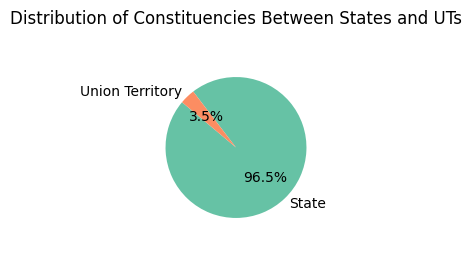

In [151]:
region_split = state_constituency_count.groupby('Region_Type')['No_of_Constituencies'].sum()
plt.figure(figsize=(2,3))
plt.pie(region_split, labels=region_split.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Distribution of Constituencies Between States and UTs")
plt.axis('equal')
plt.show()

**BarPlot of State Name and No. of constituencies**

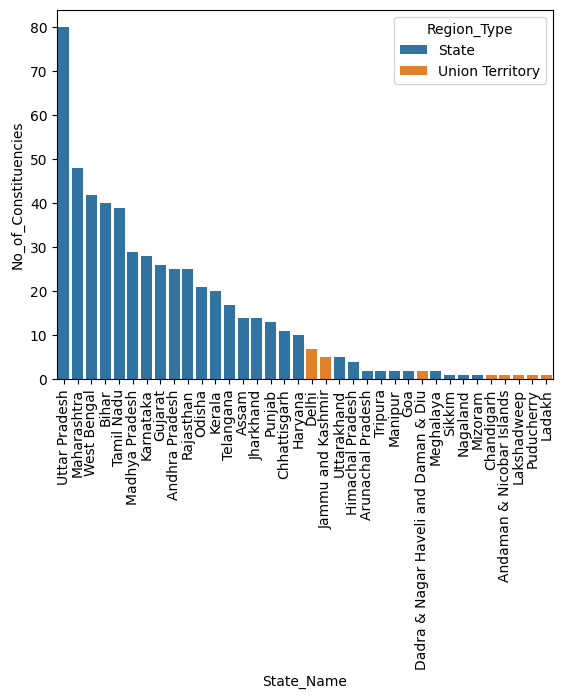

In [152]:
No_of_Constituencies = state_constituency_count.sort_values(by='No_of_Constituencies', ascending=False)\
 [['Region_Type','State_Name', 'No_of_Constituencies']].reset_index(drop=True)

sns.barplot(data=No_of_Constituencies, x='State_Name', y='No_of_Constituencies', hue='Region_Type')
plt.xticks(rotation=90)
plt.show()

In [153]:
# no. of candidates from each party
party_candidate_count = constituencywise_details.groupby('Party')['Candidate'].nunique()

party_candidate_count.sort_values(ascending=False).reset_index().head(10)

,Party,Candidate
0,Independent,3831
1,Bahujan Samaj Party,487
2,Bharatiya Janata Party,441
3,Indian National Congress,327
4,Socialist Unity Centre Of India (COMMUNIST),150
5,Peoples Party of India (Democratic),79
6,Samajwadi Party,71
7,Communist Party of India (Marxist),52
8,All India Trinamool Congress,47
9,Bharatheeya Jawan Kisan Party,41


*   **Indian National Developmental Inclusive Alliance - INDIA**
*   **National Democratic Alliance - NDA**

In [154]:
india_parties = [
    'Indian National Congress - INC',
    'Aam Aadmi Party - AAAP',
    'All India Trinamool Congress - AITC',
    'Bharat Adivasi Party - BHRTADVSIP',
    'Communist Party of India  (Marxist) - CPI(M)',
    'Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)',
    'Communist Party of India - CPI',
    'Dravida Munnetra Kazhagam - DMK',
    'Indian Union Muslim League - IUML',
    'Jammu & Kashmir National Conference - JKN',
    'Jharkhand Mukti Morcha - JMM',
    'Kerala Congress - KEC',
    'Marumalarchi Dravida Munnetra Kazhagam - MDMK',
    'Nationalist Congress Party Sharadchandra Pawar - NCPSP',
    'Rashtriya Janata Dal - RJD',
    'Rashtriya Loktantrik Party - RLTP',
    'Revolutionary Socialist Party - RSP',
    'Samajwadi Party - SP',
    'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT',
    'Viduthalai Chiruthaigal Katchi - VCK'
]

In [155]:
nda_parties = ['Bharatiya Janata Party - BJP', 'Telugu Desam - TDP', 'Janata Dal  (United) - JD(U)',
               'Shiv Sena - SHS', 'AJSU Party - AJSUP', 'Apna Dal (Soneylal) - ADAL',
               'Asom Gana Parishad - AGP', 'Hindustani Awam Morcha (Secular) - HAMS',
               'Janasena Party - JnP', 'Janata Dal  (Secular) - JD(S)', 'Lok Janshakti Party(Ram Vilas) - LJPRV',
               'Nationalist Congress Party - NCP', 'Rashtriya Lok Dal - RLD', 'Sikkim Krantikari Morcha - SKM']

In [156]:
def assign_alliance(party):
    if party in nda_parties:
        return 'NDA'
    elif party in india_parties:
        return 'I.N.D.I.A'
    else:
        return 'OTHER'

partywise_results['party_alliance'] = partywise_results['Party'].apply(assign_alliance)

In [157]:
partywise_results.sample(5)

,Party,Won,Party ID,party_alliance
31,Lok Janshakti Party(Ram Vilas) - LJPRV,5,3165,NDA
6,Indian National Congress - INC,99,742,I.N.D.I.A
15,Revolutionary Socialist Party - RSP,1,1534,I.N.D.I.A
14,Rashtriya Loktantrik Party - RLTP,1,2484,I.N.D.I.A
9,Jharkhand Mukti Morcha - JMM,3,852,I.N.D.I.A


In [158]:
other_parties = partywise_results[partywise_results['party_alliance'] == 'OTHER']['Party'].unique()

In [159]:
nda_total_won = partywise_results.loc[partywise_results['Party'].isin(nda_parties), 'Won'].sum()
print("total seats won by NDA Aliance : ", nda_total_won)

total seats won by NDA Aliance :  292


In [160]:
india_total_won = partywise_results.loc[partywise_results['Party'].isin(india_parties), 'Won'].sum()
print("total seats won by I.N.D.I.A. Aliance : ", india_total_won)

total seats won by I.N.D.I.A. Aliance :  234


In [161]:
other_total_won = partywise_results.loc[partywise_results['Party'].isin(other_parties), 'Won'].sum()
print("total seats won by OTHER Parties : ", other_total_won)

total seats won by OTHER Parties :  17


**Seats Won by NDA Parties**

In [162]:
nda_seats = partywise_results[partywise_results['Party'].isin(nda_parties)][['Party', 'Won']] \
                                .rename(columns={'Party': 'Party_Name', 'Won': 'Seats_Won'}) \
                                .sort_values('Seats_Won', ascending=False)
print("Seats Won by NDA Parties")
nda_seats.reset_index(drop = True)

Seats Won by NDA Parties


,Party_Name,Seats_Won
0,Bharatiya Janata Party - BJP,240
1,Telugu Desam - TDP,16
2,Janata Dal (United) - JD(U),12
3,Shiv Sena - SHS,7
4,Lok Janshakti Party(Ram Vilas) - LJPRV,5
5,Janasena Party - JnP,2
6,Rashtriya Lok Dal - RLD,2
7,Janata Dal (Secular) - JD(S),2
8,AJSU Party - AJSUP,1
9,Apna Dal (Soneylal) - ADAL,1


**Seats Won by I.N.D.I.A. Parties**

In [163]:
india_seats = partywise_results[partywise_results['Party'].isin(india_parties)][['Party', 'Won']] \
                                .rename(columns={'Party': 'Party_Name', 'Won': 'Seats_Won'}) \
                                .sort_values('Seats_Won', ascending=False)
print("Seats Won by I.N.D.I.A. Parties")
india_seats.reset_index(drop = True)

Seats Won by I.N.D.I.A. Parties


,Party_Name,Seats_Won
0,Indian National Congress - INC,99
1,Samajwadi Party - SP,37
2,All India Trinamool Congress - AITC,29
3,Dravida Munnetra Kazhagam - DMK,22
4,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9
5,Nationalist Congress Party Sharadchandra Pawar...,8
6,Communist Party of India (Marxist) - CPI(M),4
7,Rashtriya Janata Dal - RJD,4
8,Indian Union Muslim League - IUML,3
9,Aam Aadmi Party - AAAP,3


**Seats Won by OTHER Parties**

In [164]:
other_seats = partywise_results[partywise_results['Party'].isin(other_parties)][['Party', 'Won']] \
                                .rename(columns={'Party': 'Party_Name', 'Won': 'Seats_Won'}) \
                                .sort_values('Seats_Won', ascending=False)
print("Seats Won by OTHER Parties")
other_seats.reset_index(drop = True)

Seats Won by OTHER Parties


,Party_Name,Seats_Won
0,Independent - IND,7
1,Yuvajana Sramika Rythu Congress Party - YSRCP,4
2,All India Majlis-E-Ittehadul Muslimeen - AIMIM,1
3,Aazad Samaj Party (Kanshi Ram) - ASPKR,1
4,Shiromani Akali Dal - SAD,1
5,"United People’s Party, Liberal - UPPL",1
6,Voice of the People Party - VOTPP,1
7,Zoram People’s Movement - ZPM,1


**Which Alliance Won Most Seats**

In [165]:
merged = constituencywise_results.merge(partywise_results[['Party ID', 'party_alliance']], on='Party ID')
seats_by_alliance = merged['party_alliance'].value_counts().reset_index()
seats_by_alliance.columns = ['party_alliance', 'Seats_Won']
seats_by_alliance

,party_alliance,Seats_Won
0,NDA,292
1,I.N.D.I.A,234
2,OTHER,17


**A pie chart showing the proportion of seats won by**

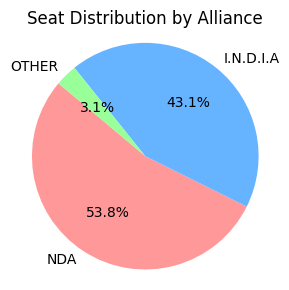

In [166]:
plt.figure(figsize=(3, 3))
plt.pie(seats_by_alliance['Seats_Won'],
        labels=seats_by_alliance['party_alliance'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['#ff9999','#66b3ff','#99ff99'])

plt.title("Seat Distribution by Alliance")
plt.axis('equal')
plt.tight_layout()
plt.show()

**Winning Candidate in Specific Constituency & State**

In [167]:
result = constituencywise_results.merge(partywise_results, on='Party ID') \
                                 .merge(statewise_results, on='Parliament Constituency') \
                                 .merge(states, on='State ID')

Kanpur = result[(result['State'] == 'Uttar Pradesh') & (result['Constituency Name'] == 'KANPUR')] \
        [['Winning Candidate', 'Party', 'party_alliance', 'Total Votes', 'Margin_x', 'Constituency Name', 'State']].reset_index(drop = True)

Kanpur

,Winning Candidate,Party,party_alliance,Total Votes,Margin_x,Constituency Name,State
0,RAMESH AWASTHI,Bharatiya Janata Party - BJP,NDA,443055,20968,KANPUR,Uttar Pradesh


**Total Seats Won by Each Alliance in Each State**

In [168]:
alliance_state = result.pivot_table(
    index='State',
    columns='party_alliance',
    values='Constituency ID',
    aggfunc='count',
    fill_value=0
).reset_index()


alliance_state.columns.name = None

alliance_state = alliance_state.sort_values('State')
print("Total Seats Won by Each Alliance in Each State : \n\n",alliance_state)


Total Seats Won by Each Alliance in Each State : 

                                    State  I.N.D.I.A  NDA  OTHER
0              Andaman & Nicobar Islands          0    1      0
1                         Andhra Pradesh          0   21      4
2                      Arunachal Pradesh          0    2      0
3                                  Assam          3   10      1
4                                  Bihar          9   30      1
5                             Chandigarh          1    0      0
6                           Chhattisgarh          1   10      0
7   Dadra & Nagar Haveli and Daman & Diu          0    1      1
8                                  Delhi          0    7      0
9                                    Goa          1    1      0
10                               Gujarat          1   25      0
11                               Haryana          5    5      0
12                      Himachal Pradesh          0    4      0
13                     Jammu and Kashmir          2 

**Top 10 Candidates with Highest EVM Votes**

In [169]:
top_candidates = constituencywise_details.loc[constituencywise_details.groupby('Constituency ID')['EVM Votes'].idxmax()] \
                                        .merge(constituencywise_results, on='Constituency ID') \
                                        [['Constituency Name', 'Constituency ID', 'Candidate', 'EVM Votes']] \
                                        .sort_values('EVM Votes', ascending=False).head(10)

print("Top 10 Candidates with Highest EVM Votes : \n", top_candidates)

Top 10 Candidates with Highest EVM Votes : 
     Constituency Name Constituency ID              Candidate  EVM Votes
33             DHUBRI            S032        RAKIBUL HUSSAIN    1468549
189            INDORE           S1226        SHANKAR LALWANI    1223746
180           VIDISHA           S1218  SHIVRAJ SINGH CHOUHAN    1111556
138    BANGALORERURAL           S1023       DR C N MANJUNATH    1075553
486            RAIPUR            S268      BRIJMOHAN AGRAWAL    1047447
448    DIAMONDHARBOUR           S2521      ABHISHEK BANERJEE    1043493
100           NAVSARI           S0625              C R PATIL    1023366
105       GANDHINAGAR            S066              AMIT SHAH     999984
139    BANGALORENORTH           S1024      SHOBHA KARANDLAJE     982805
521        MALKAJGIRI            S297        EATALA RAJENDER     980712


**Winner and Runner-up in Each Constituency (Uttar Pradesh)**

In [170]:
uttar = constituencywise_results.merge(statewise_results, on='Parliament Constituency') \
                                .merge(states, on='State ID')
uttar_const_ids = uttar[uttar['State'] == 'Uttar Pradesh']['Constituency ID'].unique()

filtered = constituencywise_details[constituencywise_details['Constituency ID'].isin(uttar_const_ids)].copy()
filtered['Rank'] = filtered.groupby('Constituency ID')['Total Votes'].rank(method='first', ascending=False)

winners = filtered[filtered['Rank'] == 1]
runners = filtered[filtered['Rank'] == 2]

merged2 = constituencywise_results[['Constituency ID', 'Constituency Name']].drop_duplicates()
final_uttarpradesh = merged2.merge(winners[['Constituency ID', 'Candidate']], on='Constituency ID') \
              .rename(columns={'Candidate': 'Winning Candidate'}) \
              .merge(runners[['Constituency ID', 'Candidate']], on='Constituency ID') \
              .rename(columns={'Candidate': 'Runnerup Candidate'}) \
              .sort_values('Constituency Name')

final_uttarpradesh

,Constituency ID,Constituency Name,Winning Candidate,Runnerup Candidate
0,S2418,AGRA,PROF S P SINGH BAGHEL,SURESH CHAND KARDAM
1,S2444,AKBARPUR,DEVENDRA SINGH ALIAS BHOLE SINGH,RAJARAM PAL
2,S2415,ALIGARH,SATISH KUMAR GAUTAM,BIJENDRA SINGH
3,S2452,ALLAHABAD,UJJWAL RAMAN SINGH,NEERAJ TRIPATHI
4,S2455,AMBEDKARNAGAR,LALJI VERMA,RITESH PANDEY
...,...,...,...,...
75,S2458,SHRAWASTI,RAM SHIROMANI VERMA,SAKET MISRA
76,S2430,SITAPUR,RAKESH RATHOR,RAJESH VERMA
77,S2438,SULTANPUR,RAMBHUAL NISHAD,MANEKA SANJAY GANDHI
78,S2433,UNNAO,SWAMI SACHCHIDANAND HARI SAKSHI,ANNU TANDON


**State Summary (Uttar Pradesh)**

In [171]:
merged4 = constituencywise_results.merge(statewise_results, on='Parliament Constituency') \
                                  .merge(states, on='State ID') \
                                  .merge(constituencywise_details, on='Constituency ID') \
                                  .merge(partywise_results, on='Party ID')

Uttar_data = merged4[merged4['State'] == 'Uttar Pradesh']

summary = {
    'Total_Seats': Uttar_data['Constituency ID'].nunique(),
    'Total_Candidates': Uttar_data['Candidate'].nunique(),
    'Total_Parties': Uttar_data['Party_x'].nunique(),
    'Total_Votes': (Uttar_data['EVM Votes'] + Uttar_data['Postal Votes']).sum(),
    'Total_EVM_Votes': Uttar_data['EVM Votes'].sum(),
    'Total_Postal_Votes': Uttar_data['Postal Votes'].sum()
}

summary_df = pd.DataFrame(summary, index = [0])
summary_df

,Total_Seats,Total_Candidates,Total_Parties,Total_Votes,Total_EVM_Votes,Total_Postal_Votes
0,80,825,166,87911642,87675134,236508


**Percentage of Total Seats Secured by Each Alliance (NDA, I.N.D.I.A., OTHER)**

In [172]:
from collections.abc import ValuesView
seats_by_alliance = constituencywise_results.merge(partywise_results[['Party ID', 'party_alliance']], on='Party ID')
percent_by_alliance = seats_by_alliance['party_alliance'].value_counts(normalize=True) * 100
percent_by_alliance = percent_by_alliance.reset_index().rename(columns={'proportion': 'Percentage'})
percent_by_alliance

,party_alliance,Percentage
0,NDA,53.775322
1,I.N.D.I.A,43.093923
2,OTHER,3.130755


**State-Wise: Alliance with Majority Seats**

In [173]:
# Count constituencies won by each alliance in each state
state_alliance_wins = merged4.groupby(['State', 'party_alliance'])['Constituency ID'].nunique().reset_index()

# For each state, get the alliance with maximum constituencies
idx = state_alliance_wins.groupby('State')['Constituency ID'].idxmax()
majority_by_state = state_alliance_wins.loc[idx].reset_index(drop=True)


majority_by_state.rename(columns={'party_alliance': 'Majority_Alliance', 'Constituency ID': 'Seats_Won'}, inplace=True)

majority_by_state


,State,Majority_Alliance,Seats_Won
0,Andaman & Nicobar Islands,NDA,1
1,Andhra Pradesh,NDA,21
2,Arunachal Pradesh,NDA,2
3,Assam,NDA,10
4,Bihar,NDA,30
5,Chandigarh,I.N.D.I.A,1
6,Chhattisgarh,NDA,10
7,Dadra & Nagar Haveli and Daman & Diu,NDA,1
8,Delhi,NDA,7
9,Goa,I.N.D.I.A,1


**Identify the State where NDA or I.N.D.I.A. Won the Maximum Seats**

In [174]:
state_seat_count = state_alliance_wins.pivot(index='State', columns='party_alliance', values='Constituency ID').fillna(0)
state_seat_count['Max_Seats'] = state_seat_count[['NDA', 'I.N.D.I.A']].max(axis=1)
state_seat_count['Dominant_Alliance'] = state_seat_count[['NDA', 'I.N.D.I.A']].idxmax(axis=1)

# Get the state with max overall seats by a single alliance
max_winning_state = state_seat_count.sort_values('Max_Seats', ascending=False).head(1)
max_winning_state

party_alliance,I.N.D.I.A,NDA,OTHER,Max_Seats,Dominant_Alliance
State,,,,,
Uttar Pradesh,43.0,36.0,1.0,43.0,I.N.D.I.A


**Constituency-Level: Vote Share of Top 3 Candidates**

In [175]:
details = constituencywise_details.copy()
details['VoteShare'] = details.groupby('Constituency ID')['Total Votes'].transform(lambda x: (x / x.sum()) * 100)

# Ranking candidates within each constituency
details['VoteRank'] = details.groupby('Constituency ID')['Total Votes'].rank(method='first', ascending=False)

# Top 3 per constituency
top_3 = details[details['VoteRank'] <= 3].sort_values(['Constituency ID', 'VoteRank'])
top_3.head(9)

,S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Constituency ID,VoteShare,VoteRank
4108,1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,471470,5535,477005,40.96,S011,40.964150,1.0
4109,2,KOTHAPALLI GEETHA,Bharatiya Janata Party,417113,9312,426425,36.62,S011,36.620450,2.0
4110,3,APPALANARASA PACHIPENTA,Communist Party of India (Marxist),119016,4113,123129,10.57,S011,10.574050,3.0
5273,1,PUTTA MAHESH KUMAR,Telugu Desam,737644,8707,746351,54.00,S0110,54.003223,1.0
5274,2,KARUMURI SUNIL KUMAR,Yuvajana Sramika Rythu Congress Party,559318,5176,564494,40.84,S0110,40.844717,2.0
5286,14,NOTA,None of the Above,22371,144,22515,1.63,S0110,1.629103,3.0
6600,1,BALASHOWRY VALLABHANENI,Janasena Party,712149,12290,724439,55.22,S0111,55.216219,1.0
6601,2,SIMHADRI CHANDRA SEKHAR RAO,Yuvajana Sramika Rythu Congress Party,495211,6049,501260,38.21,S0111,38.205676,2.0
6602,3,GOLLU KRISHNA,Indian National Congress,31130,695,31825,2.43,S0111,2.425679,3.0


**Constituency Grid (Details Grid): Winner, Runner-up, Party, Margin**

In [176]:
# Already extracted winners and runners above; merging them

winner_df = details[details['VoteRank'] == 1][['Constituency ID', 'Candidate', 'Party', 'Total Votes']].rename(
    columns={'Candidate': 'Winning_Candidate', 'Party': 'Winning_Party', 'Total Votes': 'Winner_Votes'})

runner_df = details[details['VoteRank'] == 2][['Constituency ID', 'Candidate', 'Party', 'Total Votes']].rename(
    columns={'Candidate': 'Runner_Up', 'Party': 'Runner_Up_Party', 'Total Votes': 'Runner_Up_Votes'})

grid = winner_df.merge(runner_df, on='Constituency ID')
grid['Margin'] = grid['Winner_Votes'] - grid['Runner_Up_Votes']
grid = grid.merge(constituencywise_results[['Constituency ID', 'Constituency Name']], on='Constituency ID').drop_duplicates()
grid


,Constituency ID,Winning_Candidate,Winning_Party,Winner_Votes,Runner_Up,Runner_Up_Party,Runner_Up_Votes,Margin,Constituency Name
0,U084,DR JITENDRA SINGH,Bharatiya Janata Party,571076,CH LAL SINGH,Indian National Congress,446703,124373,UDHAMPUR
1,S2914,CHAMALA KIRAN KUMAR REDDY,Indian National Congress,629143,DR. BOORA NARSAIAH GOUD,Bharatiya Janata Party,406973,222170,BHONGIR
2,S0119,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam,768245,MALAGUNDLA SANKAR NARAYANA,Yuvajana Sramika Rythu Congress Party,579690,188555,ANANTHAPUR
3,S278,SANJAY SETH,Bharatiya Janata Party,664732,YASHASWINI SAHAY,Indian National Congress,544220,120512,RANCHI
4,S249,KANWAR SINGH TANWAR,Bharatiya Janata Party,476506,KUNWAR DANISH ALI,Indian National Congress,447836,28670,AMROHA
...,...,...,...,...,...,...,...,...,...
537,S134,KHADSE RAKSHA NIKHIL,Bharatiya Janata Party,630879,SHRIRAM DAYARAM PATIL,Nationalist Congress Party – Sharadchandra Pawar,358696,272183,RAVER
538,S202,ARJUN RAM MEGHWAL,Bharatiya Janata Party,566737,GOVINDRAM MEGHWAL,Indian National Congress,511026,55711,BIKANER
539,S051,SHRIPAD YESSO NAIK,Bharatiya Janata Party,257326,RAMAKANT KHALAP,Indian National Congress,141311,116015,NORTHGOA
540,S0412,RAJESH RANJAN ALIAS PAPPU YADAV,Independent,567556,SANTOSH KUMAR,Janata Dal (United),543709,23847,PURNIA


**Exporting Grid for Excel**

In [177]:
grid.to_excel("constituency_grid_output.xlsx", index=False)